In [ ]:
#In this notebook we created the Exploratory Data Analysis -- EDA --

In [2]:
# Constants
DATA_PATH = '../data/raw/train_users_2.csv'
EXPORT_PATH = "../data/processed/1_preprocessed_df.pkl"
EXPORT_PATH2 = "../data/processed/2_preprocessed_df.pkl"

FIG_DIR = "../reports/figures"

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Load packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pickle
import os

%matplotlib inline

In [4]:
# Read Data 
raw_df = pd.read_pickle(EXPORT_PATH2)

In [5]:
df = raw_df.copy()

In [6]:
#Uni-Variate Visualization

In [7]:
print(df['age'].describe())

count    213451.000000
mean         36.014767
std          10.786017
min          18.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         115.000000
Name: age, dtype: float64


In [8]:
print(df.age.describe())

count    213451.000000
mean         36.014767
std          10.786017
min          18.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         115.000000
Name: age, dtype: float64


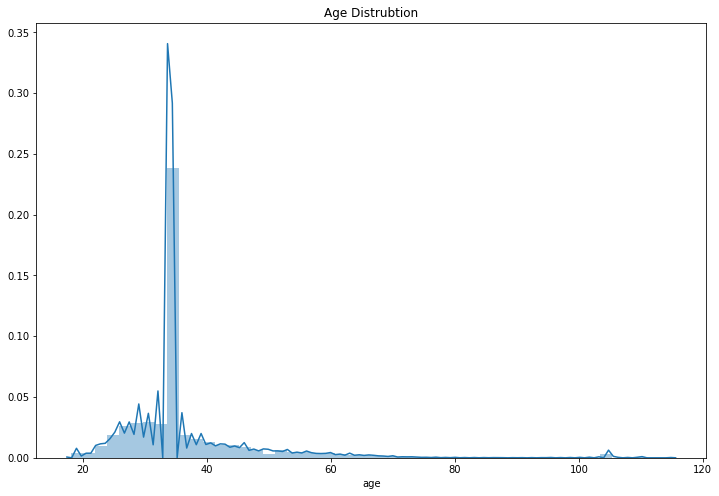

In [9]:
# Age Distrubtion
plt.figure(figsize=(12,8))
sns.distplot(df.age.dropna())
plt.title('Age Distrubtion')

plt.savefig(os.path.join(FIG_DIR, 'age_distribution_freq.png'))

In [10]:
# Investigate the questionable objects columns
questionable_cols = ['age']

for col in questionable_cols: 
    print(col)
    unique_values = raw_df[col].unique()
    print(unique_values.tolist())
    print('--------------------------' * 4)
    print()

age
[34.0, 38.0, 56.0, 42.0, 41.0, 46.0, 47.0, 50.0, 36.0, 37.0, 33.0, 31.0, 29.0, 30.0, 40.0, 26.0, 32.0, 35.0, 59.0, 49.0, 44.0, 28.0, 19.0, 53.0, 52.0, 39.0, 57.0, 25.0, 54.0, 69.0, 63.0, 43.0, 55.0, 65.0, 58.0, 61.0, 18.0, 27.0, 45.0, 60.0, 48.0, 51.0, 64.0, 72.0, 70.0, 67.0, 73.0, 104.0, 66.0, 105.0, 68.0, 95.0, 24.0, 94.0, 75.0, 79.0, 62.0, 23.0, 101.0, 98.0, 76.0, 74.0, 87.0, 92.0, 115.0, 71.0, 84.0, 107.0, 78.0, 99.0, 110.0, 102.0, 82.0, 77.0, 22.0, 89.0, 21.0, 20.0, 103.0, 86.0, 97.0, 81.0, 90.0, 88.0, 80.0, 100.0, 91.0, 106.0, 83.0, 85.0, 108.0, 113.0, 109.0, 93.0, 96.0, 111.0, 112.0]
--------------------------------------------------------------------------------------------------------



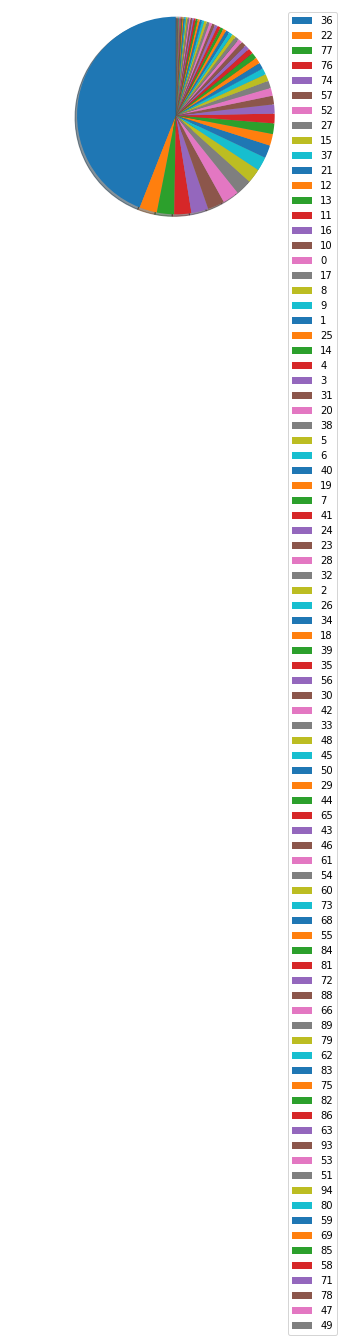

In [11]:
#using pie chart
#add colores for pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
labels = df['age'].unique().argsort()
sizes =  df['age'].value_counts().unique()
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

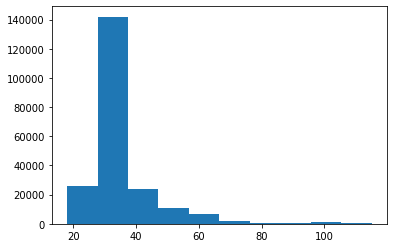

In [12]:
#Histogram
plt.hist(df['age'])
plt.show() 

In [13]:
# one way frequency table for the age column.
freq_table = pd.crosstab(df['age'], 'freq_of_ages')
freq_table

col_0,freq_of_ages
age,
18.0,669
19.0,1103
20.0,540
21.0,982
22.0,1702
...,...
110.0,196
111.0,2
112.0,1


In [14]:
#sns.swarmplot(data=df, x=df['age'].value_counts(), y=df['age'])

In [15]:
#sns.swarmplot(data=df, x=df['age'].value_counts(), y=df['age'].dropna())

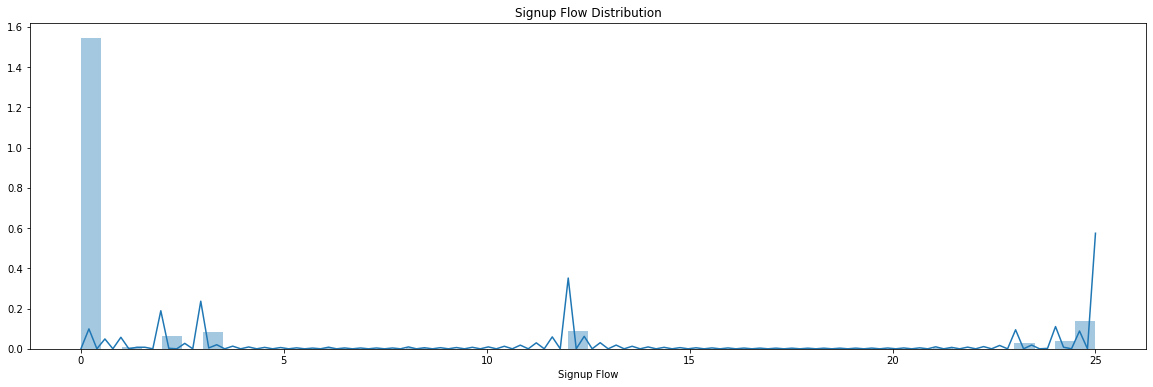

In [16]:
plt.figure(figsize=(20,6))
sns.distplot(df['signup_flow']);
plt.xlabel('Signup Flow')
plt.title('Signup Flow Distribution')

plt.savefig(os.path.join(FIG_DIR, 'Signup Flow Distribution.png'))

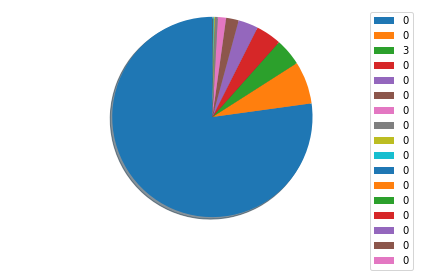

In [17]:
#using pie chart
labels = df['signup_flow']
sizes =  df['signup_flow'].value_counts()
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

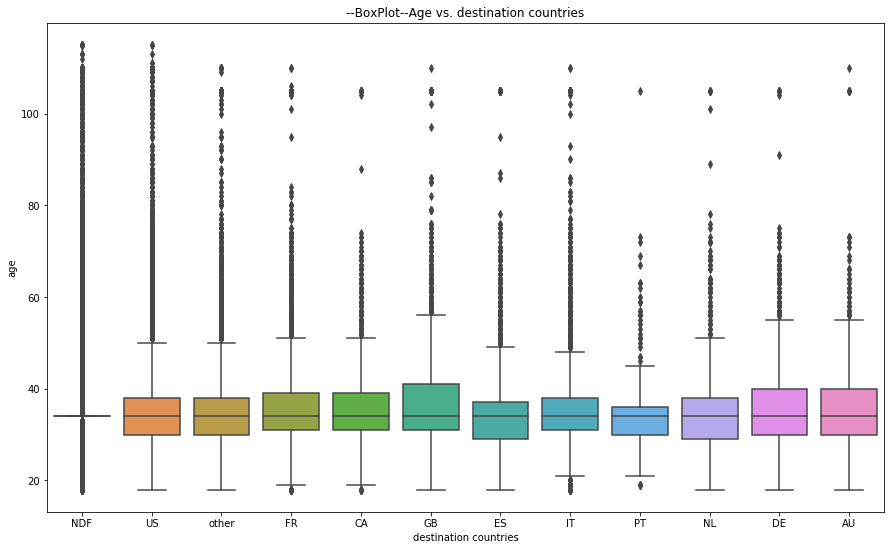

In [18]:
# Boxplot
plt.figure(figsize=(15,9))
sns.boxplot(x='country_destination',y='age', data=df.dropna())
plt.xlabel('destination countries')
plt.title('--BoxPlot--Age vs. destination countries');

plt.savefig(os.path.join(FIG_DIR, '--BoxPlot--Age vs. destination countries.png'))

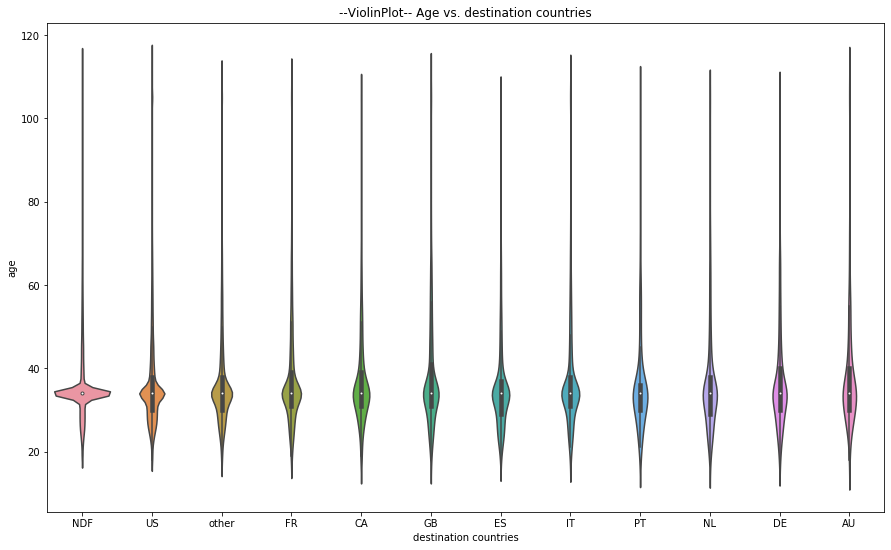

In [19]:
# Violin Plot
plt.figure(figsize=(15,9))
sns.violinplot(x='country_destination',y='age', data=df.dropna())
plt.xlabel('destination countries')
plt.title('--ViolinPlot-- Age vs. destination countries');

plt.savefig(os.path.join(FIG_DIR, '--ViolinPlot-- Age vs. destination countries.png'))

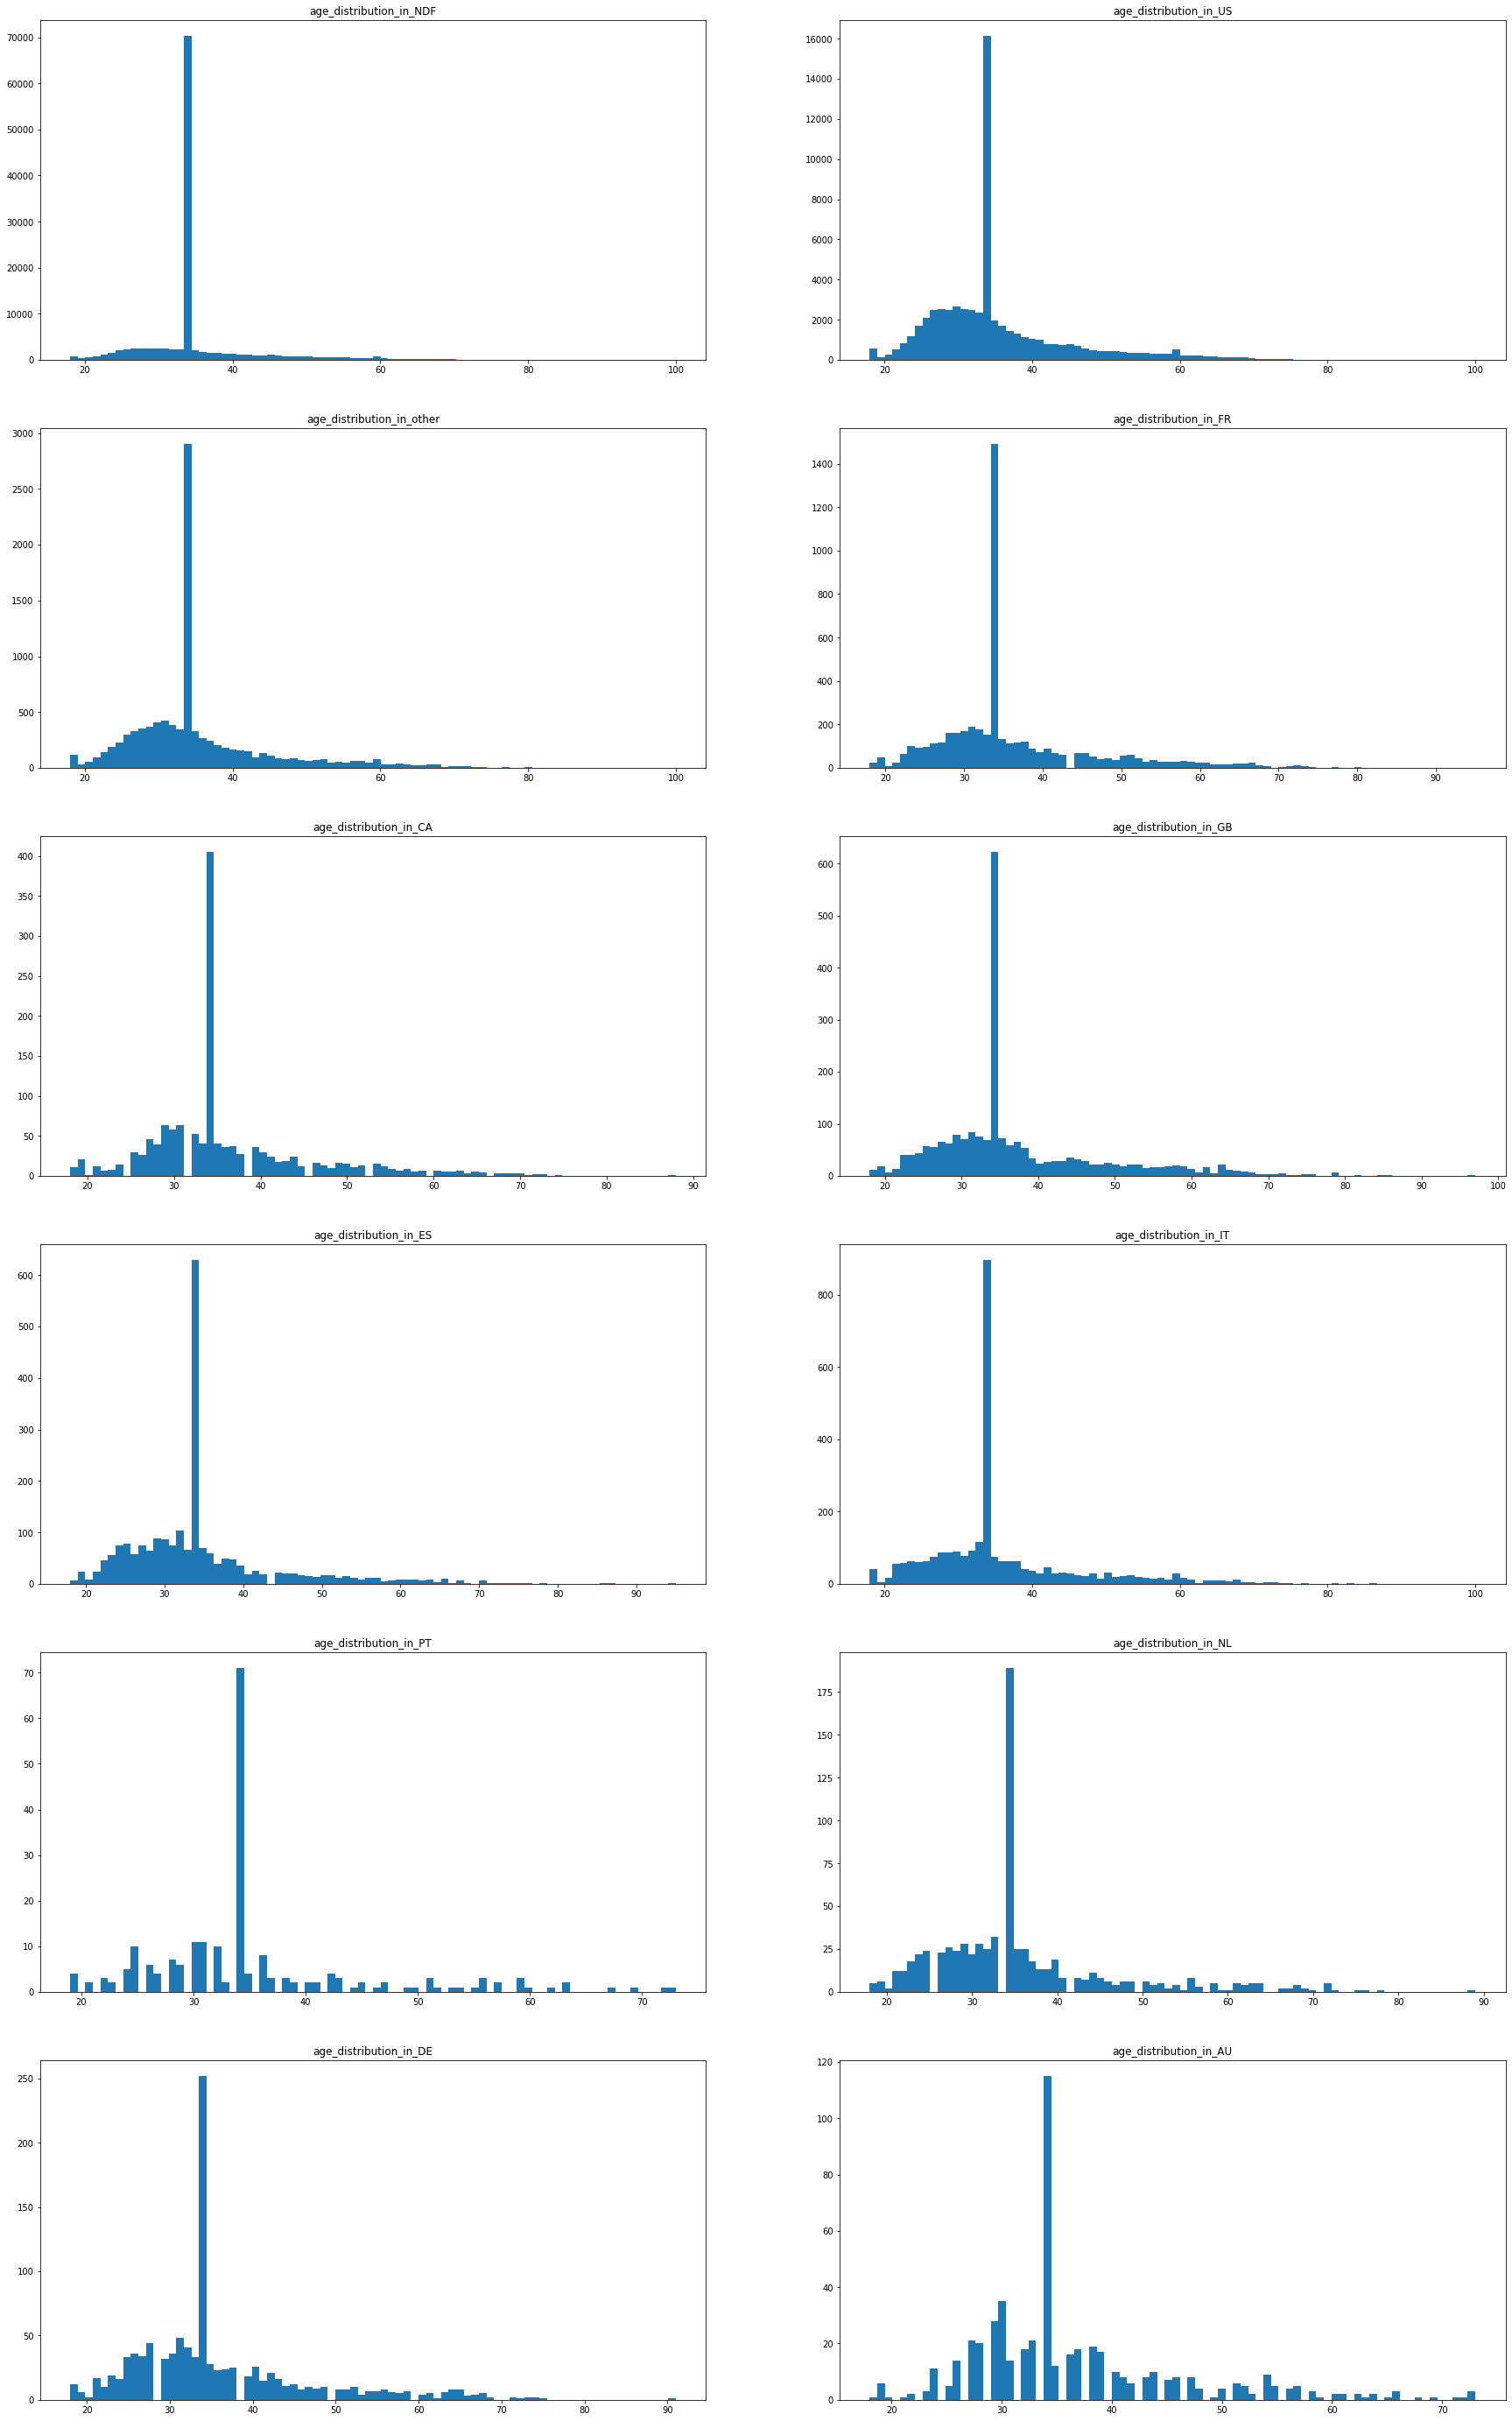

In [20]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 50))
i=0
j=0

#for col_cnts_df_list in ls_of_column_counts_df_lists[0:2]:
for country in df['country_destination'].unique():
    axes[i, j].hist(df[(df['age']<=100) & (df['country_destination']== country)]['age'], bins=80)
    axes[i, j].set_title('age_distribution_in_{}'.format(country))
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.xticks();

plt.savefig(os.path.join(FIG_DIR, 'Age dist vs. destination countries.png'))

In [21]:
#Bi-Variate Analysis

In [22]:
#add colores for plot bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 

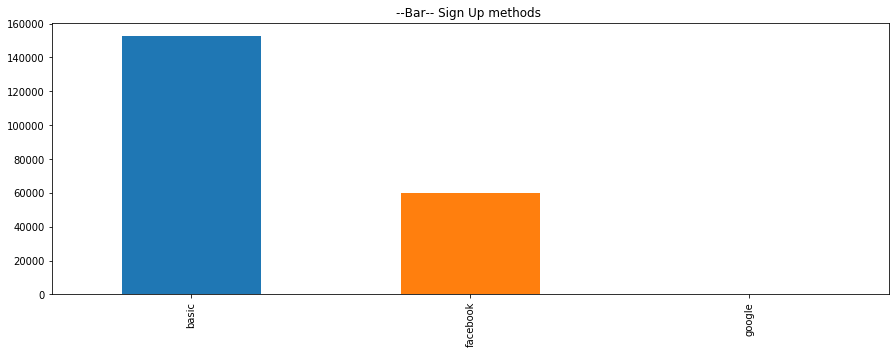

In [23]:
plt.figure(figsize = (15,5))
df.signup_method.value_counts(dropna=False).plot(kind='bar', color = colors)
plt.title("--Bar-- Sign Up methods ");

plt.savefig(os.path.join(FIG_DIR, '--Bar-- Sign Up methods.png'))

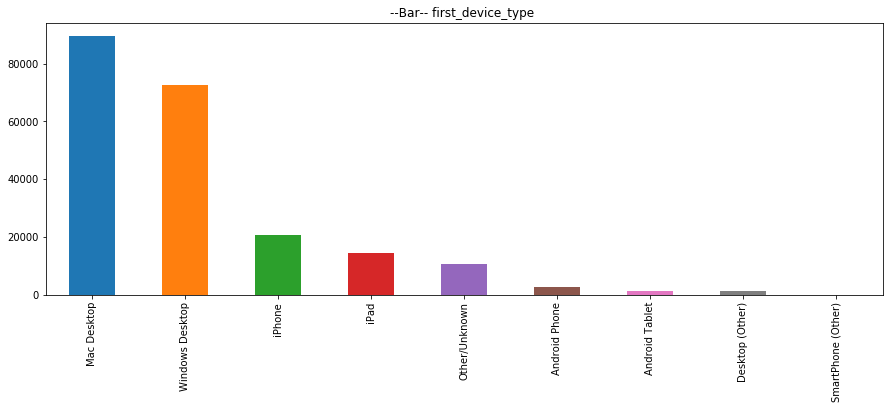

In [24]:
plt.figure(figsize = (15,5))
df.first_device_type.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.title("--Bar-- first_device_type ");

plt.savefig(os.path.join(FIG_DIR, '--Bar-- first_device_type.png'))

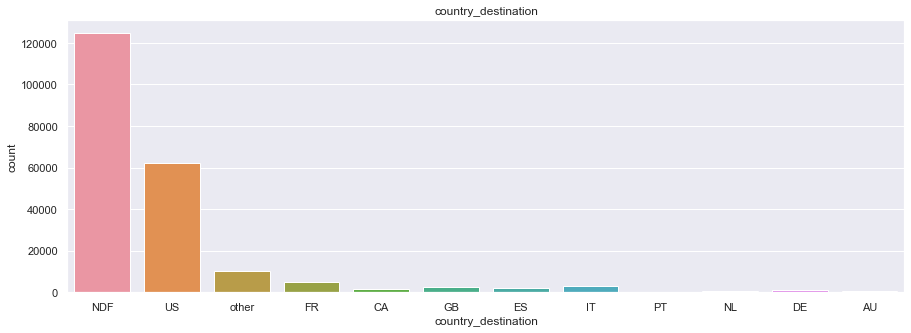

In [25]:
# destination country share

plt.figure(figsize=(15,5))

sns.set(style="darkgrid")

ax = sns.countplot(x="country_destination", data=df)

plt.title("country_destination");


plt.savefig(os.path.join(FIG_DIR, '--Bar-- country_destination.png'))

In [26]:
#Multi-variate Analysis and Visualization

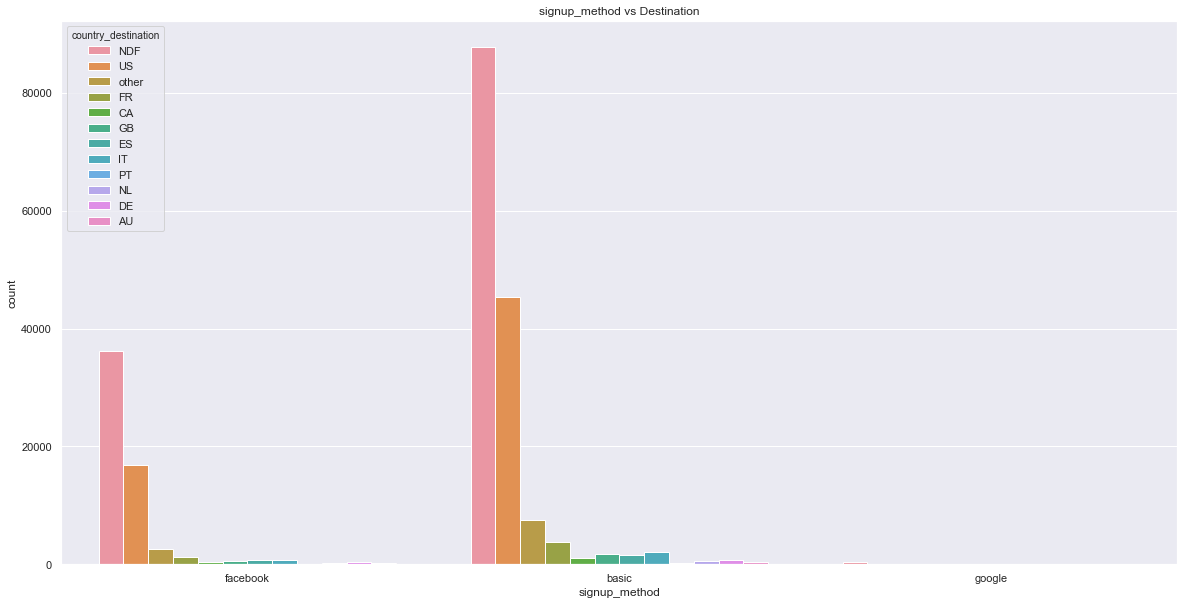

In [27]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=df)

plt.title("signup_method vs Destination");

plt.savefig(os.path.join(FIG_DIR, '--Multi-Bar-- signup_method vs Destination.png'))

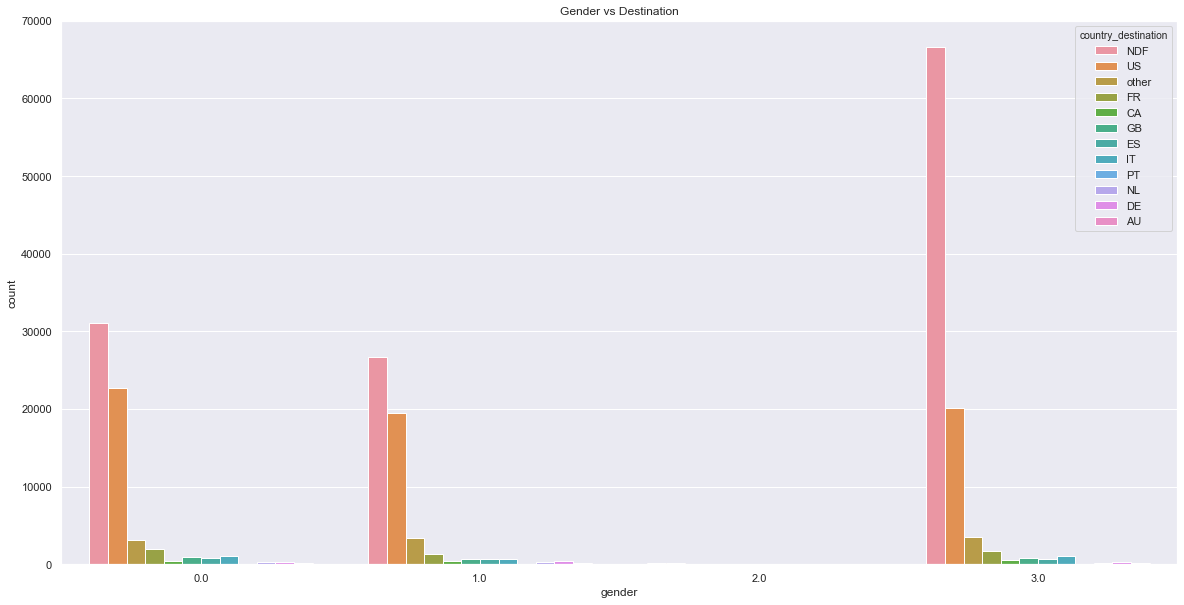

In [28]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", hue="country_destination", data=df)

plt.title("Gender vs Destination");

plt.savefig(os.path.join(FIG_DIR, '--Multi-Bar-- Gender vs Destination.pdf'))